In [6]:
using IntervalArithmetic
using LaTeXStrings
using Plots

In [7]:
include("./heatmap/index.jl")
include("./method2/index.jl")
include("./intervalPCM/index.jl")
include("./twofoldInterval/index.jl")
include("./twofoldIntervalPCM/index.jl")

print()

In [8]:
function  method2(A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}}) where {T <: Real}
    εᶿ = solveIndividualCancellingLP_m2([A₁, A₂])
    result = solveApproximationLP_m2([A₁, A₂], εᶿ)
    A = importance2TwofoldIntervalPCM_m2(result)
    return A
end

method2 (generic function with 1 method)

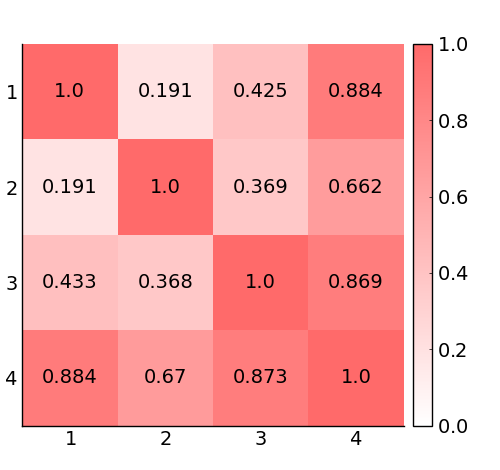

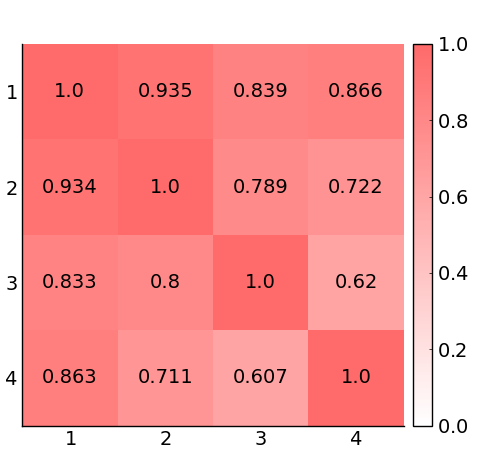

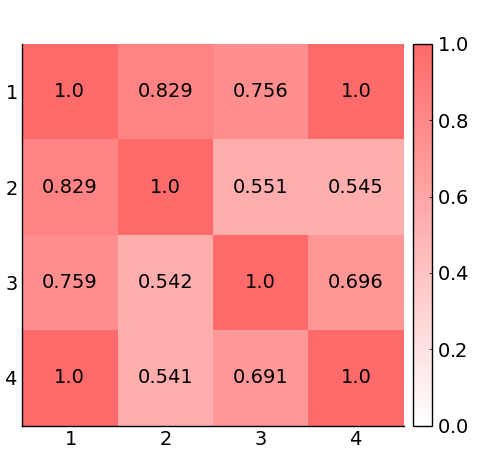

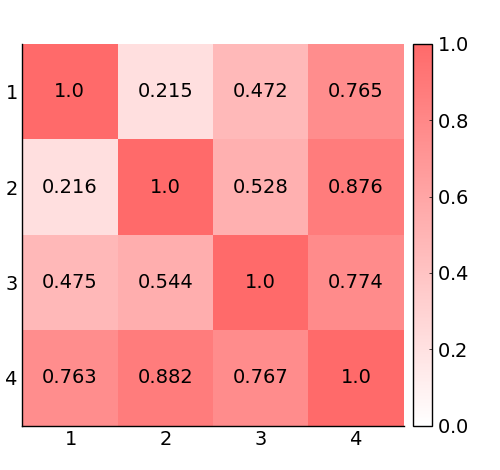

4-element Vector{Nothing}:
 nothing
 nothing
 nothing
 nothing

In [9]:
A = [
    1 2 4 4
    1/2 1 2 2
    1/4 1/2 1 1
    1/4 1/2 1 1
]

A₁ = randamizedIntervalPCM(A, 1234, 3e-2)
A₂ = randamizedIntervalPCM(A, 134, 3e-2)

Â = method2(A₁, A₂)
Â⁻, Â⁺ = twofoldIntervalMatrix2intervalMatrices(Â)

heatmap₁⁻, indices₁⁻ = plotConincidenceIndices(A₁, Â⁻, L"~~")
heatmap₁⁺, indices₁⁺ = plotConincidenceIndices(A₁, Â⁺, L"~~")
heatmap₂⁻, indices₂⁻ = plotConincidenceIndices(A₂, Â⁻, L"~~")
heatmap₂⁺, indices₂⁺ = plotConincidenceIndices(A₂, Â⁺, L"~~")

# plot([heatmap₁⁻, heatmap₁⁺, heatmap₂⁻, heatmap₂⁺]..., size=(800, 800), legend=false)
display.(plot.([heatmap₁⁻, heatmap₁⁺, heatmap₂⁻, heatmap₂⁺], size=(500, 470)))

本文のヒートマップの例

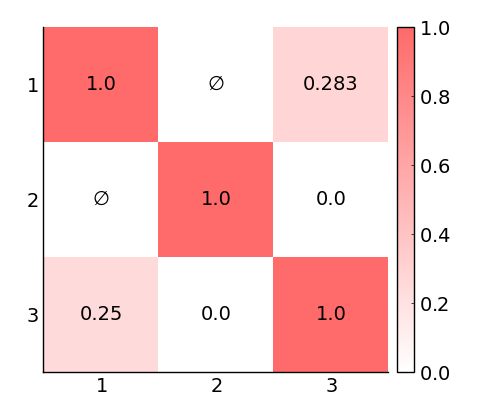

In [18]:
A₁ = [
    1..1 2.7..3.2 (1/3.3)..(1/3)
    (1/3.2)..(1/2.7) 1..1 (1/10)..(1/9.7)
    3..3.3 9.7..10 1..1
]
A₂ = [
    1..1 2.2..2.65 (1/4)..(1/2.8)
    (1/2.65)..(1/2.2) 1..1 (1/9.7)..(1/9.7)
    2.8..4 9.7..9.7 1..1
]

h, indices = plotConincidenceIndices(A₁, A₂, L"~~")
display(plot(h, size=(500, 400)))